In [624]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

fires = 'datasets/outputs/big_wildfires.csv'
temperatures = 'datasets/outputs/city_temp.csv'

data1 = pd.read_csv(fires)
data2 = pd.read_csv(temperatures)

data1['date'] = pd.to_datetime(data1['date'])
data2['date'] = pd.to_datetime(data2['date'])

data = data1.merge(data2, on='date')


In [625]:
# one hot encode the city column
data['city'] = data['city'].map({'los_angeles': 1, 'san_fran': 2, 'san_diego': 3, 'riverside': 4})

In [626]:
# some visualizations on the existing data
data

,Unnamed: 0_x,date,latitude,longitude,satellite,instrument,avg_frp,surface_temp,confidence,fire_count,Unnamed: 0_y,max_temp,min_temp,mean_temp,rain,city
0,0,2001-01-03,32.8029,-116.68920,1.0,1.0,2284.50,348.1,100.0,1,308,80.0,45.0,62.5,0.0,1
1,0,2001-01-03,32.8029,-116.68920,1.0,1.0,2284.50,348.1,100.0,1,308,63.0,46.0,54.5,0.0,2
2,0,2001-01-03,32.8029,-116.68920,1.0,1.0,2284.50,348.1,100.0,1,368,74.0,48.0,61.0,0.0,3
3,1,2001-07-27,40.8004,-120.72985,1.0,1.0,2004.45,318.8,100.0,2,513,82.0,61.0,71.5,0.0,1
4,1,2001-07-27,40.8004,-120.72985,1.0,1.0,2004.45,318.8,100.0,2,513,64.0,52.0,58.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,427,2020-10-20,37.4264,-119.10990,2.0,1.0,1874.70,304.6,100.0,1,7538,74.0,53.0,63.5,0.0,2
1526,427,2020-10-20,37.4264,-119.10990,2.0,1.0,1874.70,304.6,100.0,1,7598,74.0,67.0,70.5,0.0,3
1527,428,2020-10-26,37.4034,-119.06550,1.0,1.0,2099.80,318.1,100.0,1,7544,73.0,56.0,64.5,0.0,1
1528,428,2020-10-26,37.4034,-119.06550,1.0,1.0,2099.80,318.1,100.0,1,7544,73.0,58.0,65.5,0.0,2


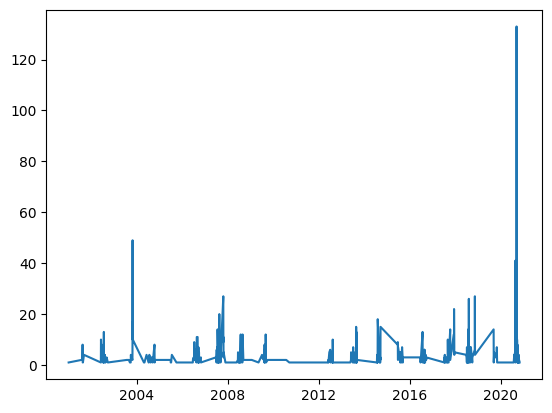

In [627]:
plt.plot(data1['date'], data1['fire_count'])
plt.show()

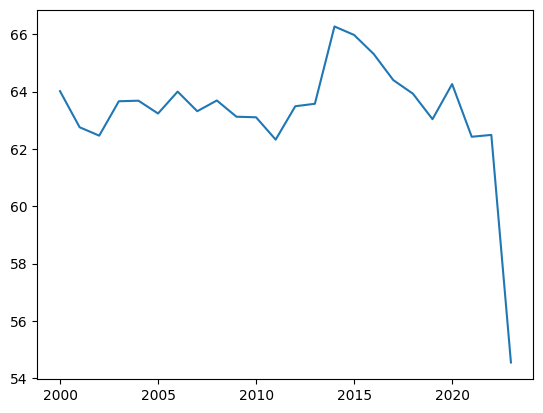

In [628]:
plt.plot(data2.groupby(data2['date'].dt.year)['mean_temp'].mean())
plt.show()
# data2.groupby(data2['date'].dt.year)['mean_temp'].mean()

In [629]:
data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'instrument'], inplace=True)

data.to_csv('datasets/outputs/temp_and-fires.csv')


In [630]:
data = pd.read_csv('datasets/outputs/temp_and-fires.csv', parse_dates=['date'])

data.rename(columns={'Unnamed: 0': "record_#"}, inplace=True)

In [631]:
data.dtypes
data

,record_#,date,latitude,longitude,satellite,avg_frp,surface_temp,confidence,fire_count,max_temp,min_temp,mean_temp,rain,city
0,0,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,80.0,45.0,62.5,0.0,1
1,1,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,63.0,46.0,54.5,0.0,2
2,2,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,74.0,48.0,61.0,0.0,3
3,3,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,82.0,61.0,71.5,0.0,1
4,4,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,64.0,52.0,58.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1525,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,53.0,63.5,0.0,2
1526,1526,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,67.0,70.5,0.0,3
1527,1527,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,56.0,64.5,0.0,1
1528,1528,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,58.0,65.5,0.0,2


In [632]:
counts = pd.DataFrame(data.groupby(data['date'].dt.year)['fire_count'].sum())

In [633]:
avgfrp = pd.DataFrame(data.groupby(data['date'].dt.year)['avg_frp'].mean())

In [634]:
newMerge = pd.merge(counts, avgfrp, on = 'date')
newMerge = newMerge.reset_index()
newMerge

,date,fire_count,avg_frp
0,2001,73,2765.323077
1,2002,268,2682.025595
2,2003,391,2207.810613
3,2004,131,2340.619209
4,2005,51,2255.825833
5,2006,433,2484.444303
6,2007,921,2673.051990
7,2008,203,2281.943833
8,2009,200,2834.168707
9,2010,12,1857.325000


In [635]:
# newMerge['date'] = newMerge['date'].astype(int)
newMerge[['date', 'fire_count']]

,date,fire_count
0,2001,73
1,2002,268
2,2003,391
3,2004,131
4,2005,51
5,2006,433
6,2007,921
7,2008,203
8,2009,200
9,2010,12


In [636]:
model = LinearRegression()
x = newMerge.drop(columns = ['fire_count'])
y = newMerge['fire_count']
model.fit(x, y)

LinearRegression()

In [637]:
model.score(x, y)

0.17991108030702474

In [638]:
len(yhat)

20

In [639]:
from sklearn.metrics import *
yhat = model.predict(x)
y = y.to_numpy()
#print(yhat, y)
#print(accuracy_score(yhat, y))

In [640]:
print(type(yhat[0]))

<class 'numpy.float64'>


In [641]:
# metrics to measure stuff
from sklearn.metrics import precision_score

def classification_metrics(Y_pred, Y_true):
    precision, recall, f1score = precision_score(Y_true, Y_pred), \
                                           recall_score(Y_true, Y_pred), \
                                           f1_score(Y_true, Y_pred)
    return precision, recall, f1score

def regression_metrics(Y_pred, Y_true):
    r2, mse, rmse = r2_score(Y_true, Y_pred), \
        mean_squared_error(Y_true, Y_pred, squared=False), \
            mean_squared_error(Y_true, Y_pred, squared=True)
    return r2, mse, rmse

In [642]:
len(yhat) == len(y)
print(len(yhat))
print(len(y))

20
20


In [643]:
print(regression_metrics(yhat, y))

(0.17991108030702474, 330.97985507099503, 109547.66446281687)


In [644]:
classification_metrics()

TypeError: classification_metrics() missing 2 required positional arguments: 'Y_pred' and 'Y_true'

In [ ]:
accuracy_score
f1_score
precision_score

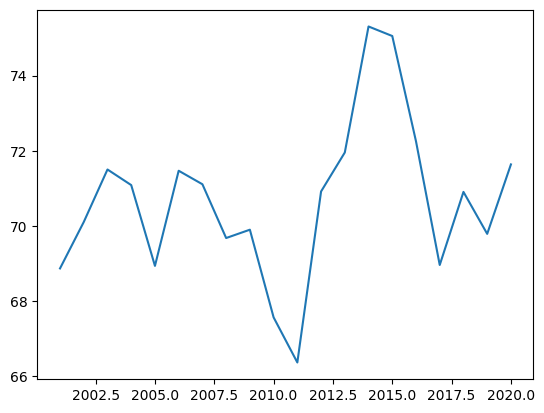

In [ ]:
plt.plot(data.groupby(data['date'].dt.year)['mean_temp'].mean())
plt.show()

## Descriptive analysis

In [ ]:
# Descriptive analysis -- lets import first

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer, 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats

In [ ]:
# after seeing correlation matrix I want to drop min and mean temp
data.drop(columns=[' min_temp', 'mean_temp'], inplace=True)
data

,record_#,date,latitude,longitude,satellite,avg_frp,surface_temp,confidence,fire_count,max_temp,rain,city
0,0,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,80.0,0.0,1
1,1,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,63.0,0.0,2
2,2,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,74.0,0.0,3
3,3,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,82.0,0.0,1
4,4,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,64.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1525,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,0.0,2
1526,1526,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,0.0,3
1527,1527,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,0.0,1
1528,1528,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,0.0,2


C:\Users\azaan\AppData\Local\Temp\ipykernel_18064\2006559383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
C:\Users\azaan\AppData\Local\Temp\ipykernel_18064\2006559383.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot: >

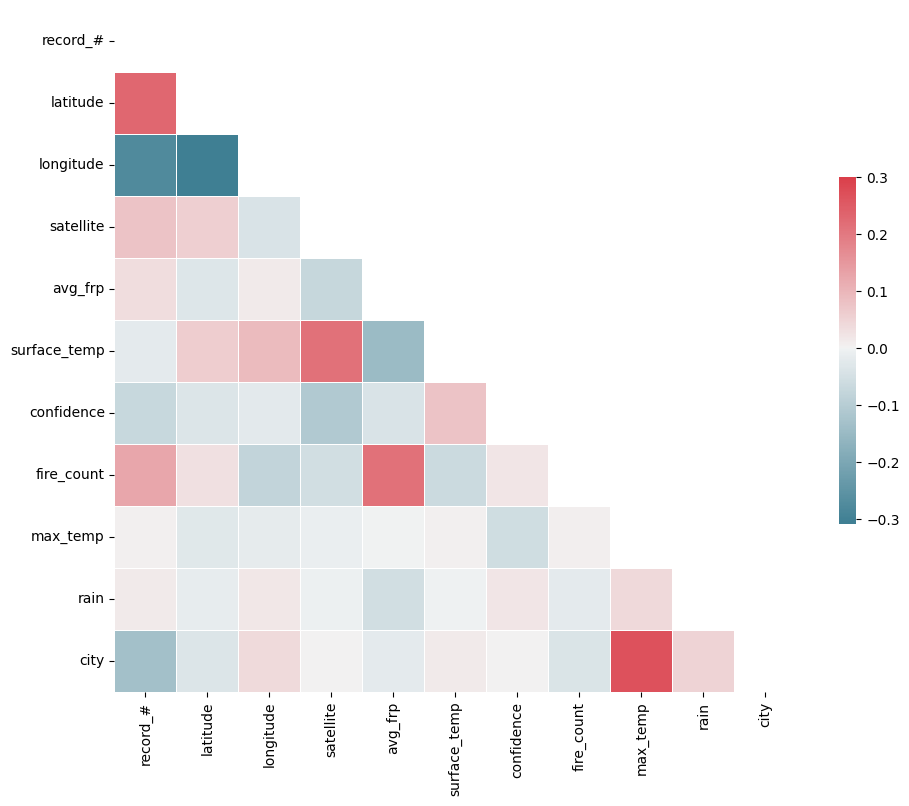

In [ ]:
#correlation matrix
corr_matrix = data.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [ ]:
data.dtypes

record_#                 int64
date            datetime64[ns]
latitude               float64
longitude              float64
satellite              float64
avg_frp                float64
surface_temp           float64
confidence             float64
fire_count               int64
max_temp               float64
rain                   float64
city                     int64
dtype: object

In [ ]:
data

,record_#,date,latitude,longitude,satellite,avg_frp,surface_temp,confidence,fire_count,max_temp,rain,city
0,0,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,80.0,0.0,1
1,1,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,63.0,0.0,2
2,2,2001-01-03,32.8029,-116.68920,1.0,2284.50,348.1,100.0,1,74.0,0.0,3
3,3,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,82.0,0.0,1
4,4,2001-07-27,40.8004,-120.72985,1.0,2004.45,318.8,100.0,2,64.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1525,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,0.0,2
1526,1526,2020-10-20,37.4264,-119.10990,2.0,1874.70,304.6,100.0,1,74.0,0.0,3
1527,1527,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,0.0,1
1528,1528,2020-10-26,37.4034,-119.06550,1.0,2099.80,318.1,100.0,1,73.0,0.0,2


In [ ]:
# So not much correlated, let's run PCA

seed = 25
scaler = StandardScaler()
scaled_data = data.drop(columns=['date'])
pca_data = pd.DataFrame(scaler.fit_transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)
# print(pca_data)
x = pca_data.drop(['avg_frp'], axis=1)
y = pca_data['avg_frp']
pca = PCA(5, random_state=seed)

x_pca = pca.fit_transform(x)
# see difference in number of columns
print(x.shape)     # 12 columns
print(x_pca.shape) # 10 columns
# can also use this
print(pca.n_components_)

# to see importance of each new column in the PCA x
# print(scaled_data.columns)
print(pca.explained_variance_ratio_)

(1530, 10)
(1530, 5)
5
[0.16274842 0.1282081  0.12514379 0.10645748 0.09884854]


In [ ]:
# get PCA x and make into df
pca_df = pd.DataFrame(data = x_pca,
                            columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5'])
pca_final_df = pd.concat([pca_df, y], axis = 1)
pca_final_df
# pca_data['avg_frp'].median()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,avg_frp
0,-2.408510,-1.573911,-0.440535,0.104566,0.006847,-0.347166
1,-2.481995,-1.873998,-0.762619,0.245838,0.069989,-0.347166
2,-2.807930,-0.881534,0.018279,0.355118,-0.228293,-0.347166
3,0.131161,-1.215705,0.520263,0.516648,-0.135873,-0.738841
4,0.066692,-1.561954,0.158787,0.659063,-0.059822,-0.738841
...,...,...,...,...,...,...
1525,1.140452,-0.347961,-0.252664,-0.432267,0.483426,-0.920309
1526,0.913694,0.136716,0.094919,-0.310418,0.327132,-0.920309
1527,1.032587,-1.712635,0.213502,-0.004118,0.536786,-0.605486
1528,0.805828,-1.227959,0.561085,0.117730,0.380492,-0.605486


In [ ]:
len(data.columns)

12

In [ ]:
# from PCA we can tell that not 1 single column is that strongly correlated
# now I will try and use ANOVA


fvalue, pvalue = stats.f_oneway(data[data.columns[0]], data[data.columns[1]], data[data.columns[2]], data[data.columns[3]], data[data.columns[4]],
                                     data[data.columns[5]], data[data.columns[6]], data[data.columns[7]], data[data.columns[8]], data[data.columns[9]], 
                                     data[data.columns[10]], data[data.columns[11]])
print(fvalue, pvalue)

13964.816882285877 0.0


In [ ]:
# Can tell data is significant bease, P < 0.05 and F is large
data.columns

Index(['record_#', 'date', 'latitude', 'longitude', 'satellite', 'avg_frp',
       'surface_temp', 'confidence', 'fire_count', 'max_temp', 'rain', 'city'],
      dtype='object')

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [666]:
#globals
seed = 25
dec_var = 'fire_count'

# x and y
x = data.drop(columns=[dec_var]) #, 'date'])
y = data[dec_var]

#declare training splits
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=seed)

In [ ]:
# use logistic regression and see results 
model = LogisticRegression(solver='liblinear', random_state=seed)

In [650]:
model.fit(x, y)
yhat = model.predict(x)
print(regression_metrics(y, yhat))

(-0.3995112712770017, 7.28199498629271, 53.02745098039216)


In [667]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>)

In [668]:
acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(y[y == 0]) / len(y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

0.8709150326797386 0.0 0.8423750032602175


In [664]:
new = X_test.copy(deep=True)
new['fire_count'] = y_test
new

,record_#,latitude,longitude,satellite,avg_frp,surface_temp,confidence,max_temp,min_temp,mean_temp,rain,city,fire_count
1362,1362,37.326267,-121.343100,1.333333,2177.200000,358.000000,100.000000,97.0,64.0,80.5,0.0,1,3
273,273,34.112000,-116.685117,1.000000,3394.966667,316.016667,99.000000,91.0,67.0,79.0,0.0,1,6
912,912,38.566900,-120.785800,2.000000,1734.200000,400.100000,100.000000,77.0,68.0,72.5,0.0,3,1
1260,1260,38.683357,-120.881929,1.214286,2405.135714,355.828571,97.857143,88.0,71.0,79.5,0.0,1,14
1400,1400,36.599700,-120.452000,1.000000,2190.000000,310.750000,100.000000,83.0,72.0,77.5,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,37.339400,-114.736000,2.000000,2181.800000,313.100000,100.000000,78.0,61.0,69.5,0.0,1,1
73,73,33.055700,-116.552700,1.000000,2347.600000,355.500000,100.000000,93.0,62.0,77.5,0.0,4,1
593,593,41.879750,-115.301042,2.000000,1890.925000,364.616667,95.750000,87.0,67.0,77.0,0.0,1,12
700,700,38.783200,-119.448800,1.000000,2345.600000,312.900000,100.000000,84.0,59.0,71.5,0.0,4,1
